In [161]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [162]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [163]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")



In [164]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)



In [165]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [166]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [167]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [168]:
#Display Data
measurement_dictionary=session.query(measurement).first()
measurement_dictionary.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f8bf48fea90>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

In [169]:
#Display Data
station_dictionary = session.query(station).first()
station_dictionary.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f8bf4f7f040>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [170]:
# Find the most recent date in the data set.
latest_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date

('2017-08-23',)

In [171]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(measurement.date, measurement.prcp).\
filter(measurement.date >= '2016-08-24').filter(measurement.date <= '2017-08-23').order_by(measurement.date).all()

In [172]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_months_df = pd.DataFrame(pre_12_months)
last_12_months_df.columns =['Date','Precipitation']
last_12_months_df


,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [173]:
# Sort the dataframe by date
last_12_months_df.sort_values(by=['Date']).head(10)

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


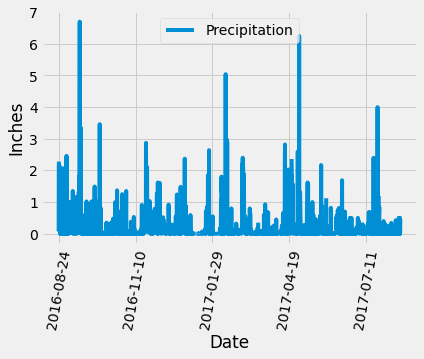

In [174]:
# Use Pandas Plotting with Matplotlib to plot the data
last_12_months_df.plot(x='Date', y='Precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation='80')
plt.show()

In [175]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12_months_df.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [176]:
# Design a query to calculate the total number stations in the dataset
total_number_of_stations = session.query(station.id).count()
total_number_of_stations

9

In [177]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

select = [measurement.station,func.count(measurement.id)]
most_activations = session.query(*select).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()


In [178]:
most_activations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [179]:
most_activations_df = pd.DataFrame(most_activations)
most_activations_df.columns =['Active Station','Count']
most_activations_df

,Active Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [180]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
avgerage_temperature = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
lowest_temperature = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
highest_temperature = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

print(f'Lowest Temp {lowest_temp}, Highest Temp {highest_temp}, Average Temp {avg_temp}')

Lowest Temp [(54.0,)], Highest Temp [(85.0,)], Average Temp [(71.66378066378067,)]


Text(0.5, 0, 'Temperature')

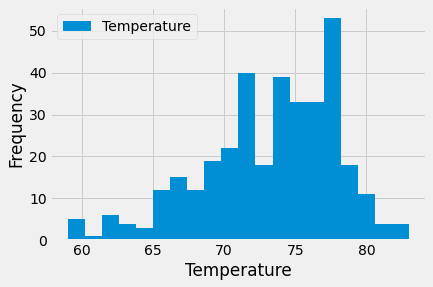

In [181]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempt_obs = pd.DataFrame(session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= '2016-08-23').all(), columns=['Temperature'])
tempt_obs.plot.hist(bins=20)
plt.xlabel('Temperature')

# Close session

In [182]:
# Close Session
session.close()